# Subclustering of midline cells in bcd-RNAi cells

In [1]:
#load packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv

In [3]:
#load data
seu_HQC <- readRDS(file = '../../data/seurat_object/bcdRNAi/seu_HQC2_bcdRNAi.obj')
seu_HQC

An object of class Seurat 
28612 features across 6473 samples within 2 assays 
Active assay: SCT (11108 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, tsne, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


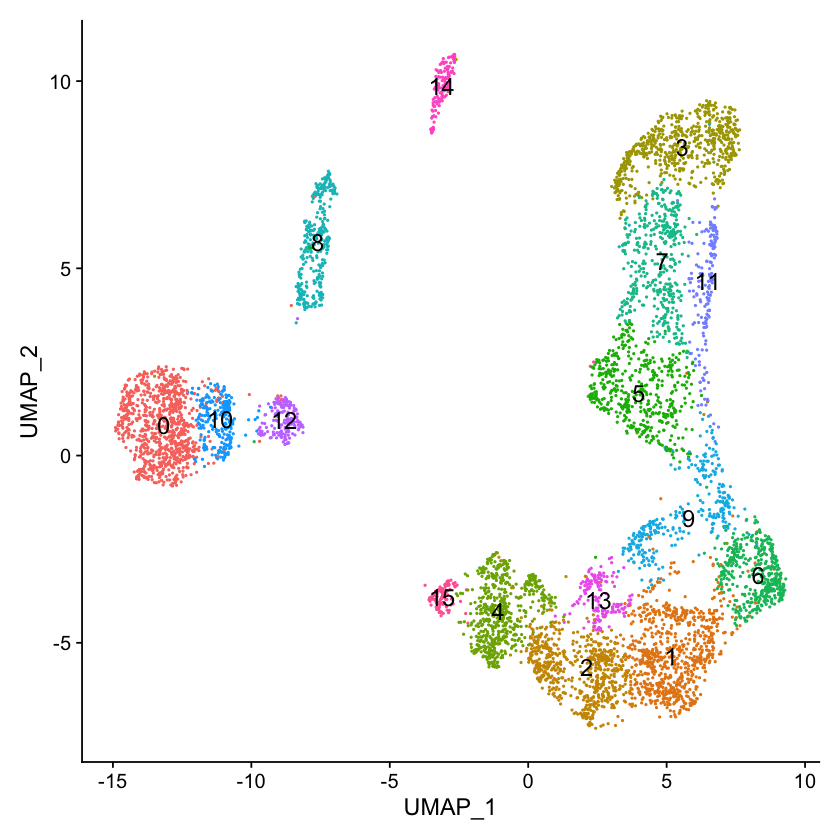

In [4]:
Idents(seu_HQC) <- 'seurat_clusters'
DimPlot(seu_HQC, reduction =  "umap", label = TRUE, label.size = 5) + NoLegend()

## picking up target clusters

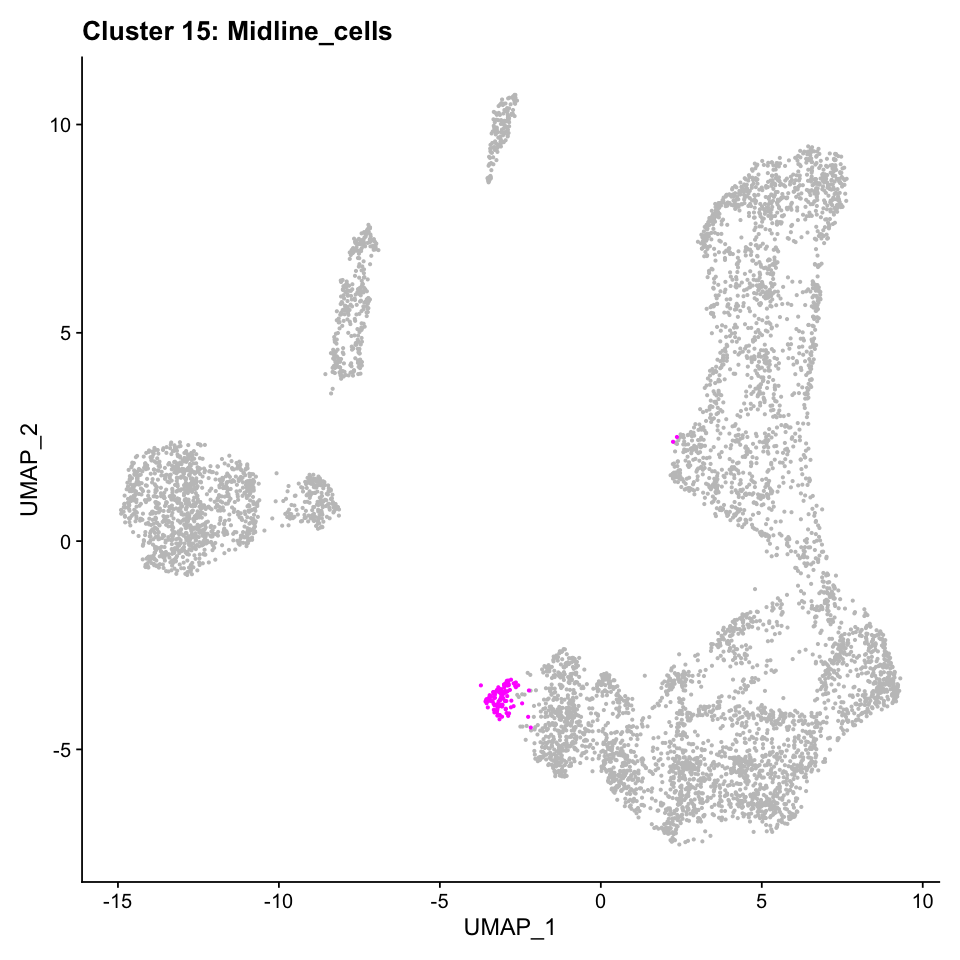

In [6]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(15))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle(
    'Cluster 15: Midline_cells')

In [7]:
seu.midline <- subset(seu_HQC, idents = c(15))
seu.midline

An object of class Seurat 
28612 features across 115 samples within 2 assays 
Active assay: SCT (11108 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, tsne, umap

## Clustering
num of cells < 500.   
Skipping renormalize

PC_ 1 
Positive:  sog, rho, sim, wntD, SoxN, D, E(spl)m7-HLH, toc, edl, ImpL2 
	   brk, vn, CG17716, vnd, Zasp52, Sema1b, l(1)sc, S, Brd, E(spl)m4-BFM 
	   HGTX, CG43355-sala, E(spl)m8-HLH, Ocho, esg, CG15480, cas, Ilp4, Cyp4g1, CG3097 
Negative:  cv-2, zfh1, salm, peb, Atx-1, disco, CG45263, rib, mirr, sna 
	   aop, fkh, hll, tup, RapGAP1, ps, Myc, dpp, ken, egr 
	   Abd-B, CG10479, MFS14, CG7029, Doc1, Pdp1, Gmap, Egfr, Svil, srp 
PC_ 2 
Positive:  trn, sog, ftz, CG14427, toc, BobA, Antp, blot, SoxN, CG16815 
	   CG4702, brk, lncRNA:CR44931, lncRNA:CR46003, lncRNA:Hsromega, vnd, sim, rho, Ppa, nub 
	   en, CG34224, ogre, lncRNA:CR43887, CG33229, Mdr49, Ocho, Sxl, phm, NijC 
Negative:  HGTX, ImpL2, Cyp4g1, E(spl)mgamma-HLH, Ect3, stg, edl, glec, CG17716, eve 
	   wun2, oc, ab, hbs, lncRNA:CR45256, btl, esg, be, CadN, ich 
	   mfas, D, CG13465, Tl, REPTOR, vn, Obp99a, Sema1b, CG13083, emc 
PC_ 3 
Positive:  trn, edl, E(spl)mgamma-HLH, HGTX, Antp, oc, stg, ab, BobA, Ubx 
	   D, wntD, Gl

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 115
Number of edges: 6141

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2084
Number of communities: 2
Elapsed time: 0 seconds


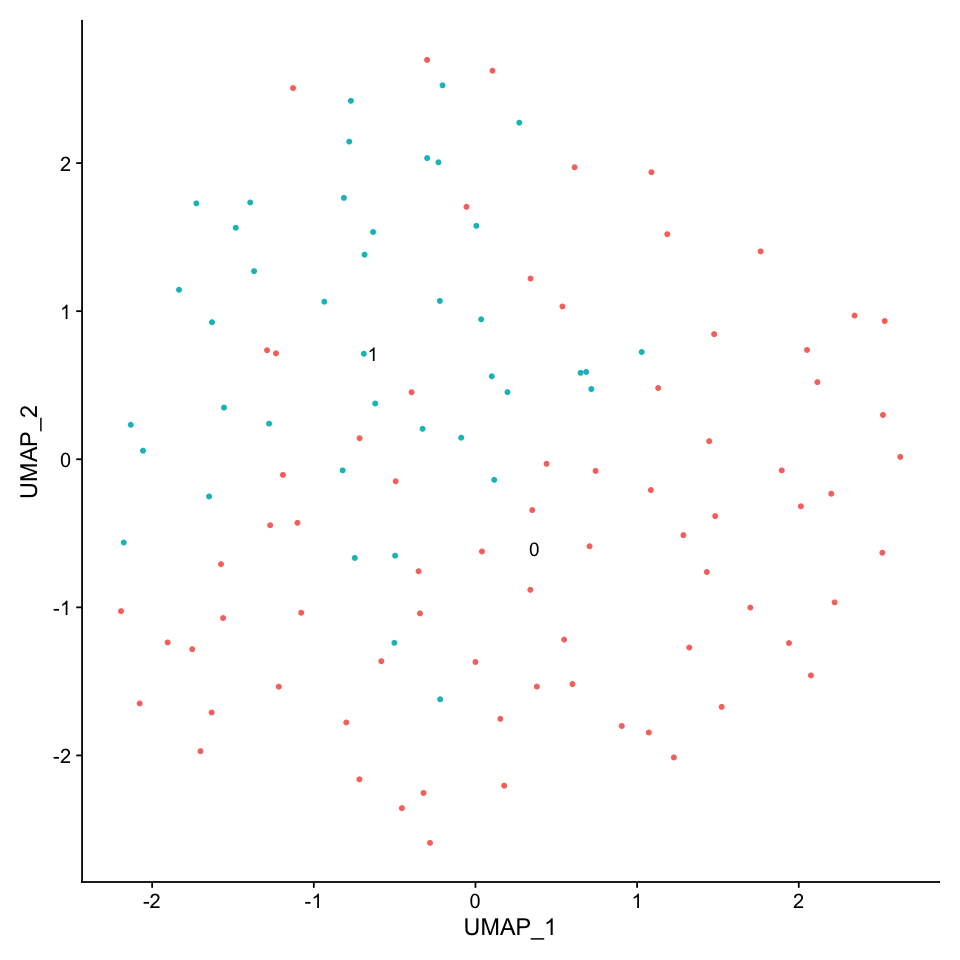

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu.midline <- RunPCA(seu.midline)
seu.midline <- RunUMAP(seu.midline, dims = 1:30)
seu.midline <- FindNeighbors(seu.midline, dims = 1:30)
seu.midline <- FindClusters(seu.midline)
DimPlot(seu.midline, reduction = 'umap', label = T) + NoLegend()

In [11]:
all.markers.post <- FindAllMarkers(object = seu.midline, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster 0

Calculating cluster 1



[1] 103

[1] 20

Warning message in DoHeatmap(seu.midline, features = c(all.markers.post.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Pcf11, CG11791, Surf6, smid, CG7872, Uhg1”


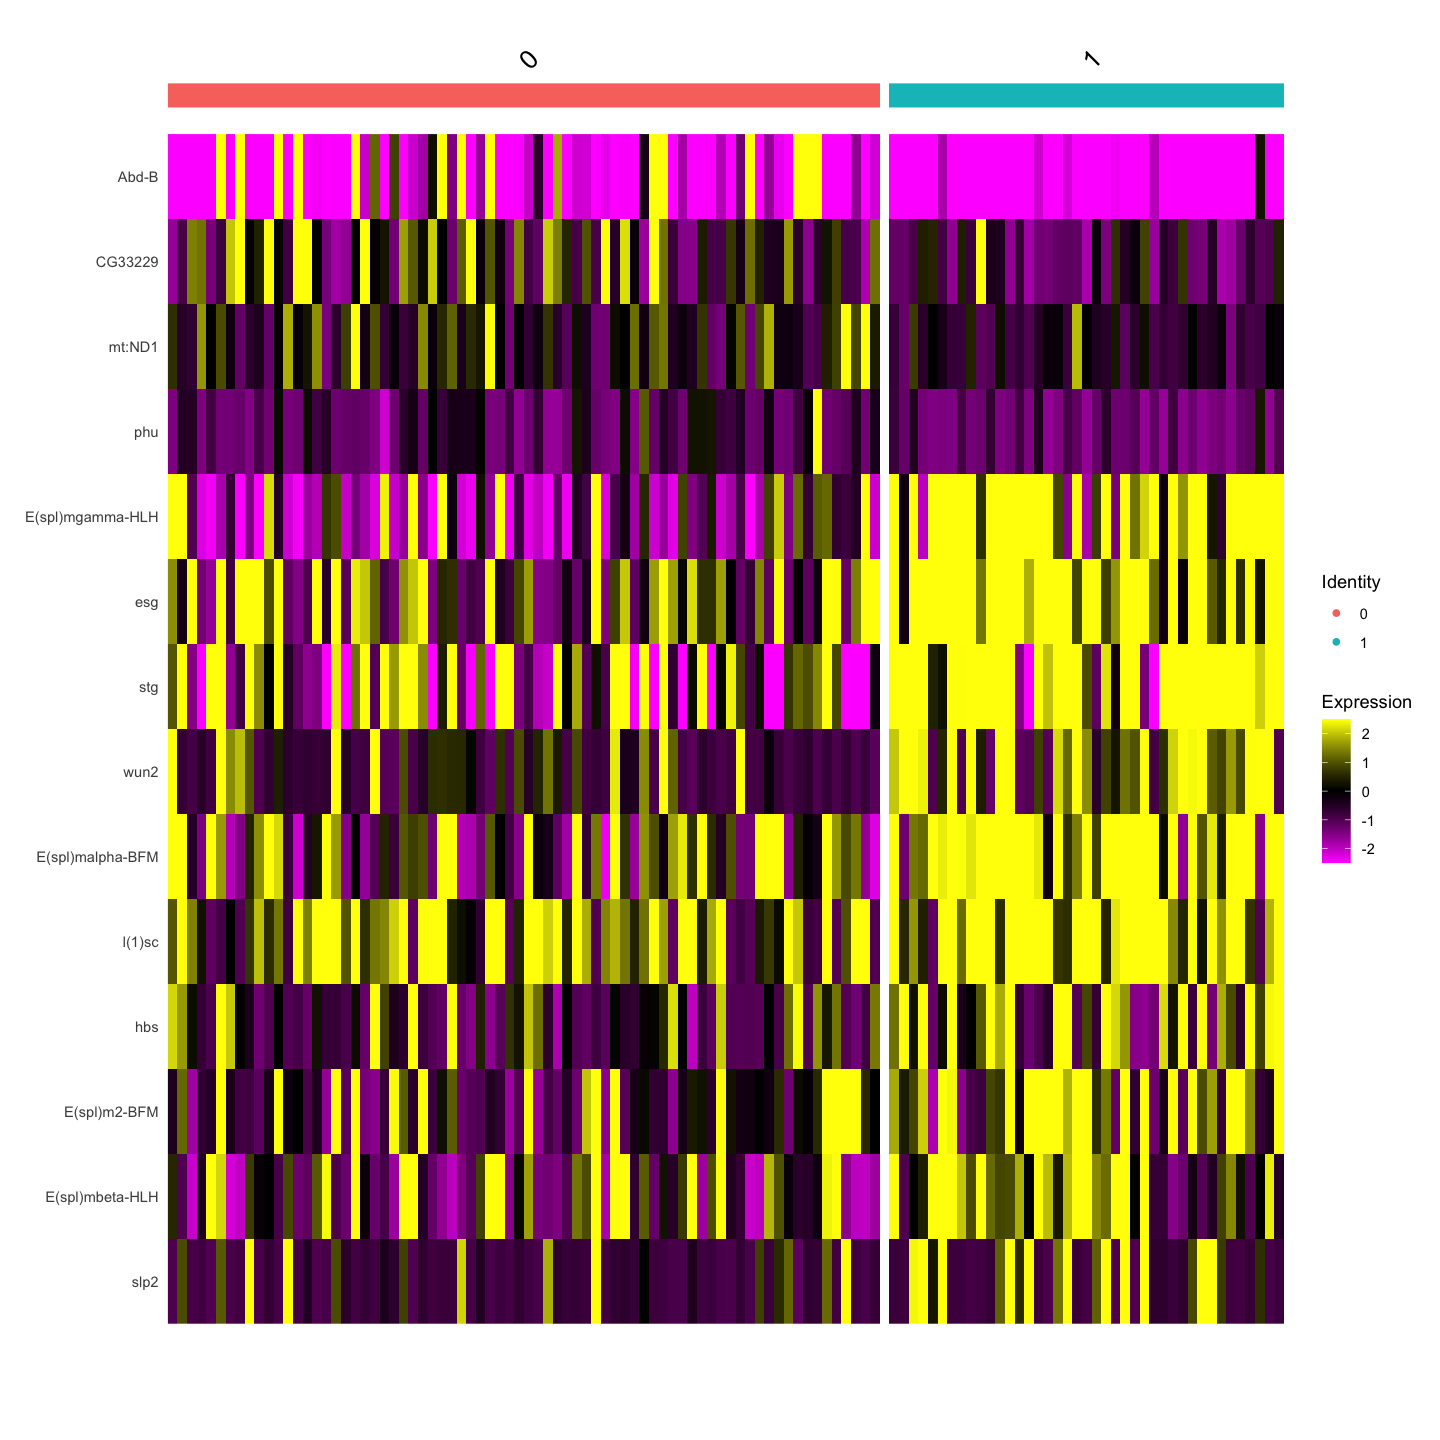

In [12]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.midline, features = c(all.markers.post.top10$gene))

No spatial markers were detected.